# 1. Visualización datos en bruto

## 1.1 Importación de librerías necesarias y definición de estructuras necesarias para corregir el formato de los datos

In [1]:
import os
import json
import mne
import datetime
import numpy as np
import matplotlib.pyplot as plt
import ast
import pickle

In [4]:
with open('../event_dict.txt', 'r') as file:
    data = file.read()

event_dict = ast.literal_eval(data)

## 1.2 Creación del raw y primera visualización de la señal

Opening raw data file ../Muestras/muestra.fif...
    Range : 0 ... 145599 =      0.000 ...   727.995 secs
Ready.


C:\Users\hernandez\AppData\Local\Temp\ipykernel_23920\2686340586.py:2: RuntimeWarning: This filename (../Muestras/muestra.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=True)


Reading 0 ... 145599  =      0.000 ...   727.995 secs...
Using matplotlib as 2D backend.


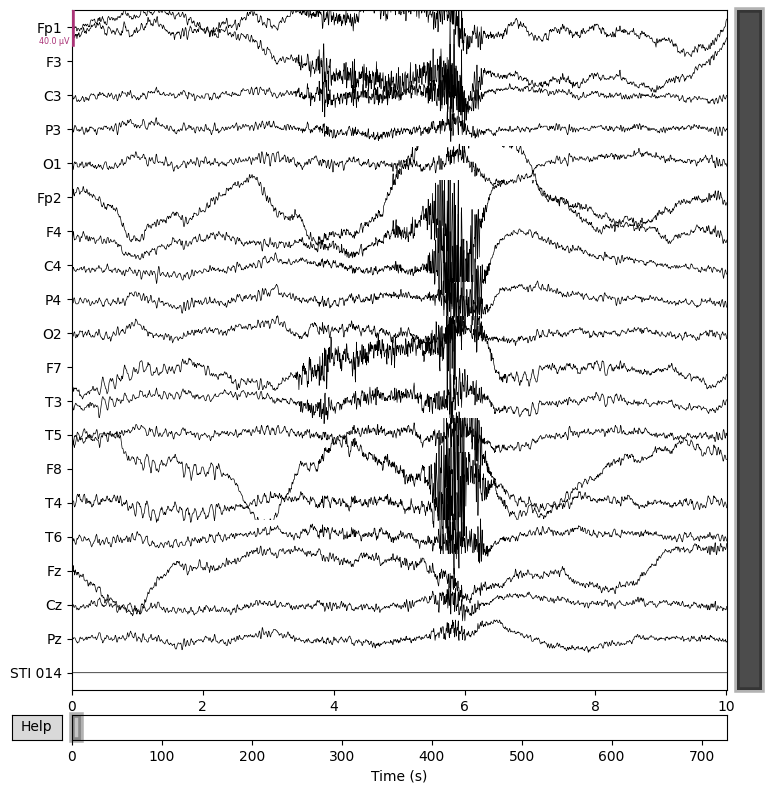

In [5]:
file = '../Muestras/muestra.fif'
raw = mne.io.read_raw_fif(file, preload=True)
fig = raw.plot()
plt.show()

## 1.3 Creación de eventos y visualización

In [4]:
events = mne.find_events(raw, stim_channel="STI 014", initial_event=True)
event_dict_selected = {}
for event_id in events[:, 2]:
    if event_id in event_dict.values():
        key = list(event_dict.keys())[list(event_dict.values()).index(event_id)]
        event_dict_selected[key] = event_id

# Montaje de electrodos según el sistema internacional 10-20 usado
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)

51 events found
Event IDs: [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


<Raw | muestra.fif, 20 x 145600 (728.0 s), ~22.3 MB, data loaded>

C:\Users\hernandez\AppData\Local\Temp\ipykernel_22412\2061101017.py:1: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  fig = mne.viz.plot_events(events, event_id = event_dict_selected, sfreq=raw.info['sfreq'])


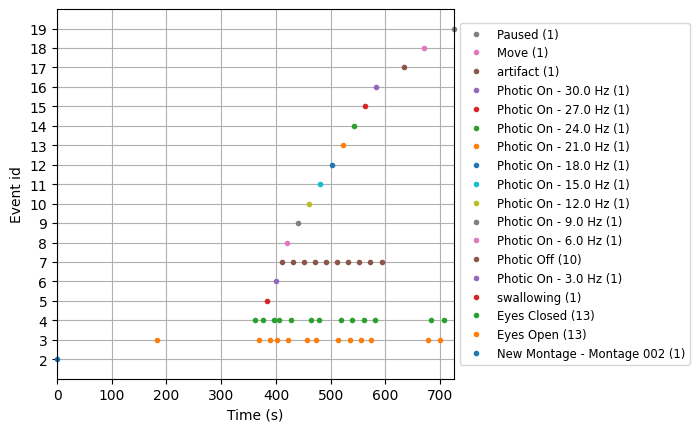

In [5]:
fig = mne.viz.plot_events(events, event_id = event_dict_selected, sfreq=raw.info['sfreq'])
plt.show()

## 1.4 Creación de épocas a partir de los eventos

In [6]:
tmin = -0.3
tmax = 0.5
baseline = (-0.2, 0)

epochs = mne.Epochs(raw,
                   events = events,
                   event_id = event_dict_selected,
                   tmin=tmin,
                   tmax=tmax,
                   baseline=baseline,
                   preload=True)
epochs

Not setting metadata
51 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 51 events and 161 original time points ...
1 bad epochs dropped


Number of events,50
Events,Eyes Closed: 13Eyes Open: 13Move: 1New Montage - Montage 002: 0Paused: 1Photic Off: 10Photic On - 12.0 Hz: 1Photic On - 15.0 Hz: 1Photic On - 18.0 Hz: 1Photic On - 21.0 Hz: 1Photic On - 24.0 Hz: 1Photic On - 27.0 Hz: 1Photic On - 3.0 Hz: 1Photic On - 30.0 Hz: 1Photic On - 6.0 Hz: 1Photic On - 9.0 Hz: 1artifact: 1swallowing: 1
Time range,-0.300 – 0.500 sec
Baseline,-0.200 – 0.000 sec


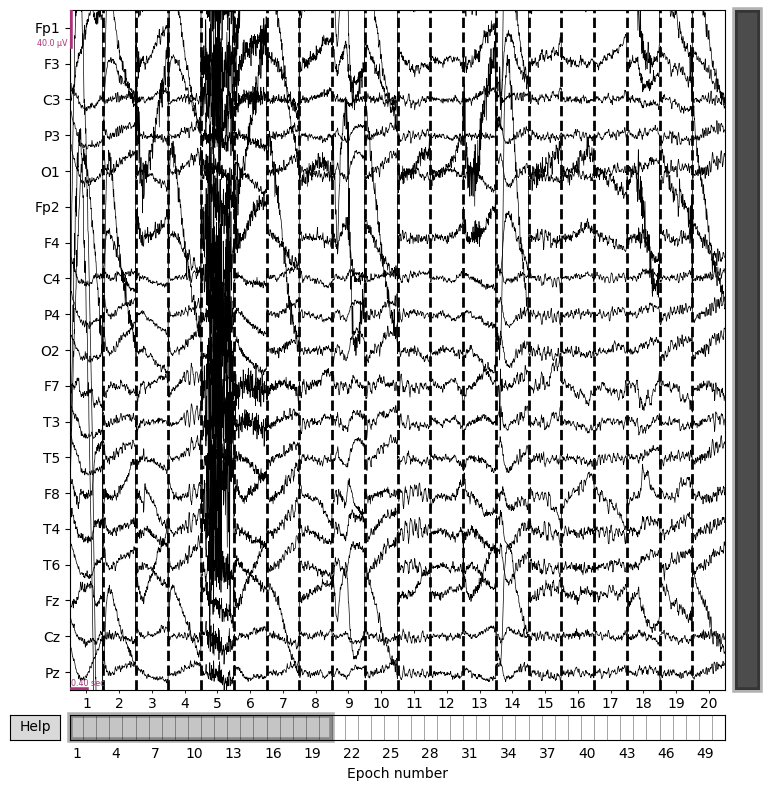

In [7]:
fig = epochs.plot()
plt.show()

## 1.5 Análisis de un evento de ejemplo

Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
combining channels using "gfp"


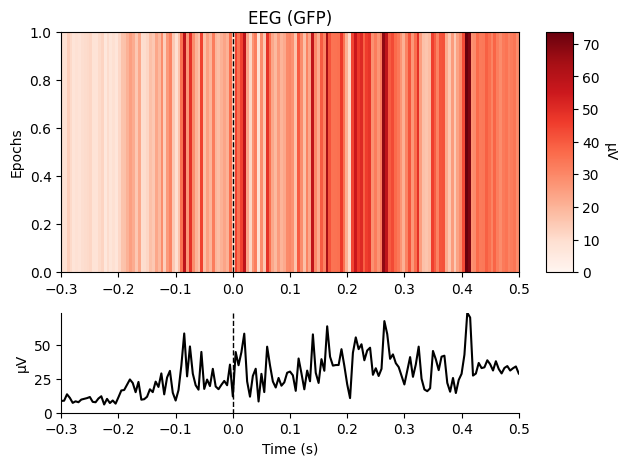

[<Figure size 640x480 with 3 Axes>]

In [8]:
# Se eligió el evento relacionado con la deglución
epochs['swallowing'].plot_image()

### 1.5.1 Generación de los datos evocados del evento y distintas visualizaciones

In [9]:
evocked_swa = epochs['swallowing'].average()

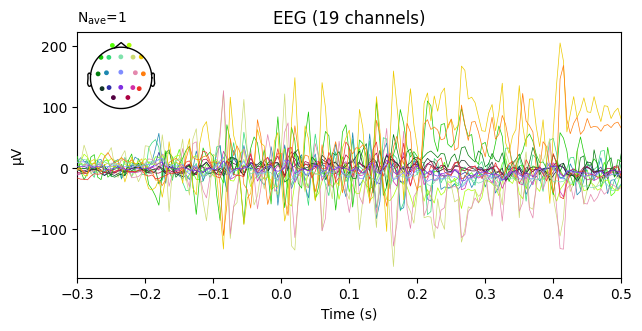

In [10]:
import matplotlib.pyplot as plt
fig = evocked_swa.plot(spatial_colors=True)
plt.show()

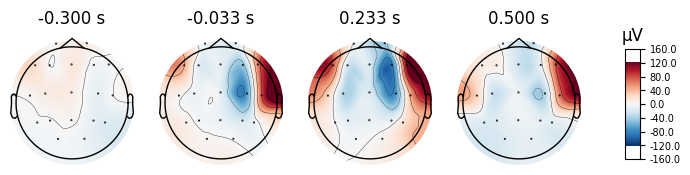

In [11]:
fig = evocked_swa.plot_topomap()
plt.show()

## 1.6 Filtrado de las señales
Aunque esta no fuese la manera de procesar las señales en el caso del proyecto, acontinuación se muestra otra posible forma de procesar los datos a modo de demostración

### 1.6.1 Definición del criterio de filtrado y limpieza de épocas

In [12]:
reject_criteria = dict(eeg=150e-6)
flat_criteria = dict(eeg=1e-6)

epochs.drop_bad(reject=reject_criteria, flat=flat_criteria)

    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'F4']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['F4', 'C4', 'F7', 'F8', 'T4']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'F4']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
 

Number of events,21
Events,Eyes Closed: 0Eyes Open: 1Move: 0New Montage - Montage 002: 0Paused: 1Photic Off: 10Photic On - 12.0 Hz: 0Photic On - 15.0 Hz: 1Photic On - 18.0 Hz: 1Photic On - 21.0 Hz: 1Photic On - 24.0 Hz: 1Photic On - 27.0 Hz: 0Photic On - 3.0 Hz: 1Photic On - 30.0 Hz: 1Photic On - 6.0 Hz: 1Photic On - 9.0 Hz: 1artifact: 1swallowing: 0
Time range,-0.300 – 0.500 sec
Baseline,-0.200 – 0.000 sec


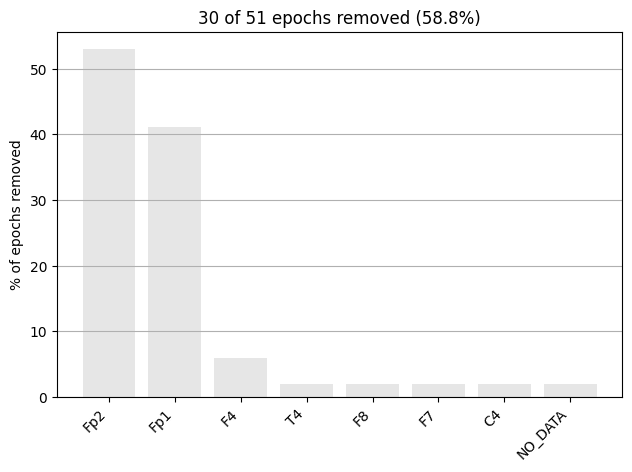

In [13]:
fig = epochs.plot_drop_log()
plt.show()

### 1.6.2 Creación y limpieza de artefactos oculares (EOG)

In [14]:
eeg_picks = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4']

projs, eog_events = mne.preprocessing.compute_proj_eog(raw, n_grad=0, n_eeg=len(eeg_picks),
                                                    ch_name=eeg_picks, verbose='INFO')

Including 0 SSP projectors from raw file
Running EOG SSP computation
Using EOG channels: Fp1, Fp2, F3, F4, C3, C4, P3, P4
EOG channel index for this subject is: [0 1 2 3 5 6 7 8]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2000 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 8 significant peaks
Number of EOG events detected: 8
Computing projector
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 35 Hz

FIR filter parameters
---------

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


Adding projection: eeg--0.200-0.200-PCA-02
Adding projection: eeg--0.200-0.200-PCA-03
Adding projection: eeg--0.200-0.200-PCA-04
Adding projection: eeg--0.200-0.200-PCA-05
Adding projection: eeg--0.200-0.200-PCA-06
Adding projection: eeg--0.200-0.200-PCA-07
Adding projection: eeg--0.200-0.200-PCA-08
Done.


8 projection items deactivated


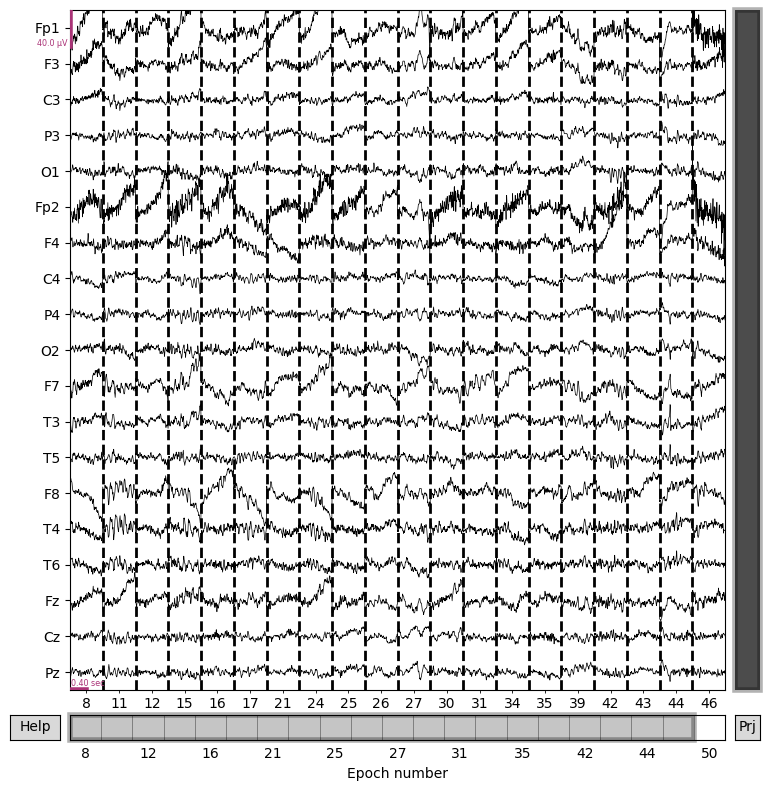

In [15]:
# Visualización de señal filtrada
epochs.add_proj(projs)
fig = epochs.plot(show=False)
plt.show()

# 2. Carga y preprocesamiento de los datos

## 2.1 Importación de librerías necesarias y pasos previos

In [16]:
import os
import json
import pprint
import matplotlib.pyplot as plt
import mne
import numpy as np
import random
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from datasets.caueeg_dataset import *
from datasets.caueeg_script import *
from datasets.pipeline import *

Se selecciona el device disponible. Durante el desarrollo original se usó la GPU con la biblioteca de torch adaptada para su uso. Se definen posteriormente parámetros necesarios para la carga de los datos con la librería específica de caueeg.

In [17]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

if device.type == 'cuda':
    num_workers = 0
    pin_memory = True
else:
    num_workers = 0
    pin_memory = False

## 2.2 Creación de datasets y dataloaders

En el poyecto se eligió la creación de dataloaders como estructuras para guardar los datos. Para esto se utilizó el módulo específico de caueeg disponible en el repositorio de GitHub https://github.com/ipis-mjkim/caueeg-ceednet
Las operaciones mostradas deben de ser realizadas para todos los conjuntos de entrenmaiento, validación y prueba. Acontinuación se mostrará el ejemplo de la creación y filtrado del dataloader de entrenamiento.

In [20]:
from torch.utils.data import ConcatDataset

# Ruta al conjunto de datos
data_path = r'C:\Users\hernandez\Documents\TFG\caueeg-dataset'

anno_path = os.path.join(data_path, 'annotation.json')
with open(anno_path, 'r') as json_file:
    annotation = json.load(json_file)

signal_headers = annotation['signal_header']
channel_ekg = signal_headers.index('EKG')
channel_photic = signal_headers.index('Photic')
new_channel_names = [name.replace('-AVG', '') for name in signal_headers]
new_channel_names = [name.replace('Z', 'z') if name.endswith('Z') else name for name in new_channel_names]

transform = transforms.Compose([
    EegRandomCrop(crop_length=200*10,       # recorte: 10s
                  latency=200*10),          # latencia: 10s
    EegDropChannels([channel_photic, channel_ekg]),       # eliminación de los canales fótico y EKG  
    EegToTensor()
])

config_data, train_dataset, val_dataset, test_dataset = load_caueeg_task_datasets(dataset_path=data_path, 
                                                                                  task='dementia',
                                                                                  load_event=True, 
                                                                                  file_format='edf',
                                                                                  transform=transform)

train_dataset = ConcatDataset([train_dataset, val_dataset, test_dataset])

train_loader = DataLoader(train_dataset,
                          batch_size=1,
                          shuffle=True,
                          drop_last=True,
                          num_workers=num_workers,
                          pin_memory=pin_memory,
                          collate_fn=eeg_collate_fn)

sample = train_dataset[0]
print(sample)

{'serial': '00587', 'age': tensor(53.), 'symptom': ['normal', 'cb_normal'], 'class_name': 'Normal', 'class_label': tensor(0), 'signal': tensor([[ 52.,  53.,  51.,  ..., -27., -29., -30.],
        [ 14.,  12.,   9.,  ...,  -7., -10., -12.],
        [  5.,   5.,   6.,  ...,   0.,  -2.,  -4.],
        ...,
        [  6.,   8.,   8.,  ...,   8.,   6.,   3.],
        [  2.,   4.,   4.,  ...,  -6.,  -9., -12.],
        [ -1.,   0.,   3.,  ...,  -7.,  -8.,  -8.]]), 'event': [[0, 'Start Recording'], [0, 'New Montage - Pz Montage'], [1158, 'Eyes Open'], [6282, 'Eyes Closed'], [11836, 'Eyes Open'], [18136, 'Eyes Closed'], [24198, 'Eyes Open'], [30036, 'Eyes Closed'], [36168, 'Eyes Open'], [41938, 'Eyes Closed'], [49246, 'Eyes Open'], [53824, 'Eyes Closed'], [59662, 'Eyes Open'], [65878, 'Eyes Closed'], [71926, 'Eyes Open'], [77848, 'Eyes Closed'], [86080, 'Eyes Open'], [90028, 'Eyes Closed'], [96076, 'Eyes Open'], [101842, 'Eyes Closed'], [107890, 'Eyes Open'], [113896, 'Eyes Closed'], [120000, 

In [21]:
signal_mean, signal_std = calculate_signal_statistics(train_loader, repeats=30, verbose=True)

## 2.3 Preprocesamiento de datos

### 2.3.1 Definición de operaciones de preprocesado para la normalización de los datos
Para la normalización de los datos se optó por utilizar la media y la desciación estándar.

In [22]:
preprocess_train = transforms.Compose([
    EegToDevice(device=device), 
    EegNormalizeMeanStd(mean=signal_mean, std=signal_std)
])

preprocess_train = torch.nn.Sequential(*preprocess_train.transforms).to(device)

transformed_dataset = []
for sample_batched in train_loader:
    transformed_batch = preprocess_train(sample_batched)
    transformed_dataset.append(transformed_batch)

### 2.3.2 Aplicación de las operaciones de de preprocesado para la normalización de los datos

In [23]:
transformed_train_loader = DataLoader(transformed_dataset,
                          batch_size=1,
                          shuffle=True,
                          drop_last=True,
                          num_workers=num_workers,
                          collate_fn=eeg_collate_fn)

### 2.3.3 Guardado del dataloader creado en un archivo .pkl

In [ ]:
with open('mean_std_train.pkl', 'wb') as f:
    pickle.dump(transformed_train_loader, f)

print("DataLoader guardado correctamente en el archivo:")

### 2.3.4 Definición de operaciones de preprocesado STFT de los datos
Se aplicó también la transformada de Fourier para descomponer las señales en sus componentes de frecuencia

In [ ]:
preprocess_train = transforms.Compose([
    EegToDevice(device=device), 
    EegSpectrogram(n_fft=200, complex_mode='as_real')
])
preprocess_train = torch.nn.Sequential(*preprocess_train.transforms).to(device)
pprint.pprint(preprocess_train)

transformed_stft = []
for sample_batched in train_loader:
    transformed_batch = preprocess_train(sample_batched)
    transformed_stft.append(transformed_batch)

### 2.3.5 Aplicación de las operaciones de de preprocesado para la normalización de los datos

In [ ]:
transformed_train_loader_stft = DataLoader(transformed_stft,
                          batch_size=1,
                          shuffle=True,
                          drop_last=True,
                          num_workers=num_workers,
                          collate_fn=eeg_collate_fn)


### 2.3.6 Guardado del dataloader creado en un archivo .pkl

In [ ]:
with open('stft_train.pkl', 'wb') as f:
    pickle.dump(transformed_train_loader_stft, f)

print("DataLoader guardado correctamente en el archivo:")